In [1]:
import cv2
import imutils
from matplotlib import pyplot as plt
%matplotlib inline

def showimage(img):
    plt.imshow(img,cmap='gray')
    plt.show()


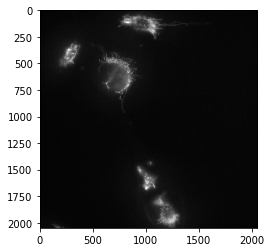

In [2]:
image = cv2.imread('../test/images/CTRL6.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (11, 11), 0)

showimage(gray)


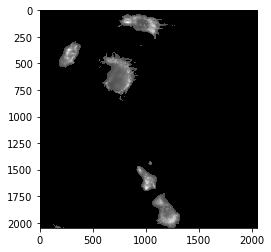

In [3]:
ret,th4 = cv2.threshold(gray,64,255,cv2.THRESH_TOZERO)
showimage(th4)

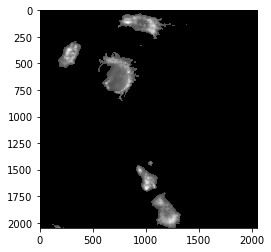

In [4]:
dilated = cv2.dilate(th4, None, iterations=3)
eroded = cv2.erode(dilated, None, iterations=5)
showimage(dilated)

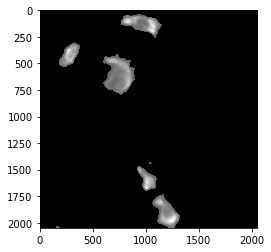

In [5]:
final = cv2.medianBlur(eroded, 31)
showimage(final)

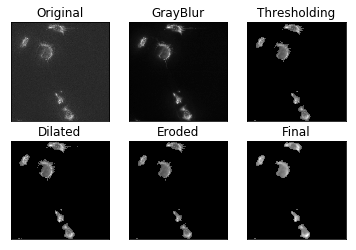

In [6]:
## plot all the images
images = [image, gray, th4, dilated, eroded, final]

titles = ['Original','GrayBlur','Thresholding',
          'Dilated','Eroded','Final']

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

In [7]:
from imutils import contours
from objectMeasure import *

# find contours in the edge map
cnts = cv2.findContours(final.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# sort the contours from left-to-right
(cnts, _) = contours.sort_contours(cnts[1])

# initialize result list
result=[]

# loop over the contours individually
for c in cnts:
            # if the contour is not sufficiently large, ignore it
            if cv2.contourArea(c) < 1024: continue
            # create the single object measure
            om=ObjectMeasure(c)
            # add it to the result list
            result.append(om)

In [8]:
for om in result:
    print (om.scaledDimensions())

(258.9555946489668, 136.85393673548452)
(381.6886820433637, 302.14938358368363)
(172.42172136943768, 369.3592424726908)
(246.07722365143832, 154.983870128475)
(207.60118015078817, 333.3005400535679)


In [9]:
for om in result:
    box=om.getBoundingBox()
    box2=np.array(box, dtype="int")
    cv2.drawContours(image, [box2.astype("int")], -1, (0, 255, 0), 2)


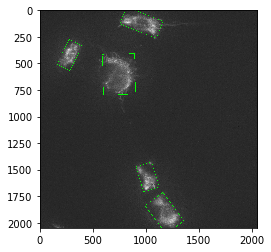

In [10]:
showimage(image)

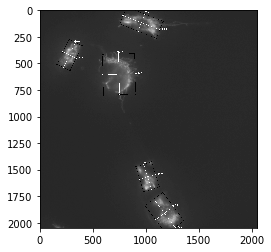

In [11]:
from imageDecorator import *
id=ImageDecorator()
img2=id.decorateImage(gray,result)
showimage(img2)

In [15]:
from imageSaver import *
isave=ImageSaver()
isave.saveImage(img2,'CTRL6X.jpg')